In [2]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
import time
from datetime import datetime, timedelta
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/simone/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    price=price.drop(['Unnamed: 0'],axis=1)
   
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    print(file)
    prices.append(price)

AAPL
AMZN
PEP
GOOGL
MSFT
FB
INTC
CSCO
CMCSA
NVDA
NFLX
BKNG
ADBE
AMGN
TXN
AVGO
PYPL
GILD
COST
QCOM


In [3]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.3922518159806295
G-score: 0.3228854239068905
Accuracy 0.33480565371024734
Window: 140
[[136 372]
 [381 243]]
Vol pos 4.061666358031034
Vol neg 2.702094009930266


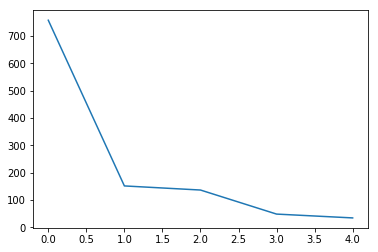

Real Percentage of gain: -163.9333997417008
Percentage of gain: -0.4375487983955198
Total gain: -495.30523978372844
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 75 309]
 [241 134]]
0.2753623188405797
Percentile:  1
[[15 51]
 [49 35]]
0.3333333333333333
Percentile:  2
[[46 12]
 [47 32]]
0.5693430656934306
Percentile:  3
[[ 0  0]
 [17 32]]
0.6530612244897959
Percentile:  4
[[ 0  0]
 [25 10]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.21031746031746032
G-score: 0.3320412466063273
Accuracy 0.2968197879858657
Window: 140
[[230  21]
 [775 106]]
Vol pos 2.440900403208918
Vol neg 2.323654886035198


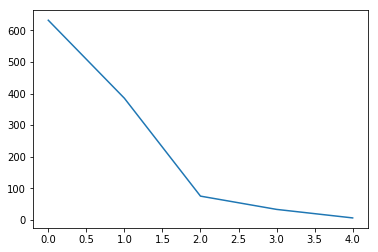

Real Percentage of gain: -183.76721939048585
Percentage of gain: -0.9094405952348242
Total gain: -1029.486753805821
000000000000000000000000000000000000000000000000
Percentile:  0
[[187  12]
 [395  37]]
0.3549920760697306
Percentile:  1
[[ 29   7]
 [316  33]]
0.16103896103896104
Percentile:  2
[[14  2]
 [56  3]]
0.22666666666666666
Percentile:  3
[[ 0  0]
 [ 6 27]]
0.8181818181818182
Percentile:  4
[[0 0]
 [1 5]]
0.8333333333333334
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0


In [ ]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    
    
    
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        scaler = MinMaxScaler() 
        scaler.fit(x)
        MinMaxScaler(copy=True, feature_range=(0, 1))
        x=scaler.transform(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-6,4,30)
        gspace=np.logspace(-6,4,30)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5251082251082251
0.5597920277296361
F1,score 0.44151275285839925
G-score: 0.45274758520065483
Accuracy 0.44974003466204504
Window: 28
[[268 240]
 [395 251]]
Vol pos 0.985501845037489
Vol neg 0.9556295623096966


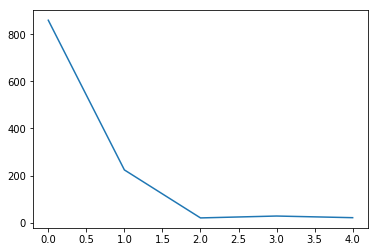

Real Percentage of gain: -12.66145597080042
Percentage of gain: -0.08262505588578906
Total gain: -95.34931449220056
000000000000000000000000000000000000000000000000
Percentile:  0
[[223 185]
 [279 172]]
0.459837019790454
Percentile:  1
[[45 53]
 [89 37]]
0.36607142857142855
Percentile:  2
[[ 0  1]
 [10  9]]
0.45
Percentile:  3
[[ 0  0]
 [10 18]]
0.6428571428571429
Percentile:  4
[[ 0  0]
 [ 6 15]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5680883308075341
0.6377816291161178
F1,score 0.37898686679174487
G-score: 0.436362715396712
Accuracy 0.42634315424610053
Window: 28
[[290 128]
 [534 202]]
Vol pos 1.1210915047630805
Vol neg 0.9657384760211647


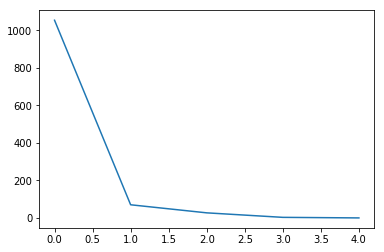

Real Percentage of gain: -36.854217163998456
Percentage of gain: -0.07603279963828025
Total gain: -87.7418507825754
000000000000000000000000000000000000000000000000
Percentile:  0
[[273 111]
 [491 177]]
0.42775665399239543
Percentile:  1
[[15 11]
 [32 12]]
0.38571428571428573
Percentile:  2
[[ 2  5]
 [11  9]]
0.4074074074074074
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44942571322712116
0.7507418397626113
F1,score 0.28656716417910444
G-score: 0.33605140635497477
Accuracy 0.29080118694362017
Window: 28
[[100  68]
 [410  96]]
Vol pos 0.7352510450153986
Vol neg 0.7076776663330032


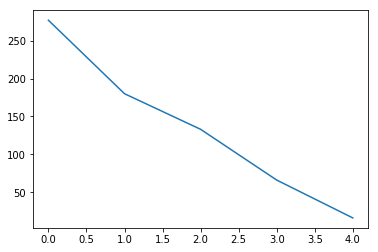

Real Percentage of gain: -35.682470705601865
Percentage of gain: -0.28807228439785965
Total gain: -194.16071968415739
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 67  29]
 [153  28]]
0.34296028880866425
Percentile:  1
[[  6  26]
 [122  26]]
0.17777777777777778
Percentile:  2
[[ 7 11]
 [86 29]]
0.2706766917293233
Percentile:  3
[[12  2]
 [42 10]]
0.3333333333333333
Percentile:  4
[[8 0]
 [6 2]]
0.625
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5540160207837194
0.561525129982669
F1,score 0.6018518518518519
G-score: 0.5431194833916776
Accuracy 0.5528596187175043
Window: 28
[[248 258]
 [258 390]]
Vol pos 1.2424938796057308
Vol neg 1.1813226782057988


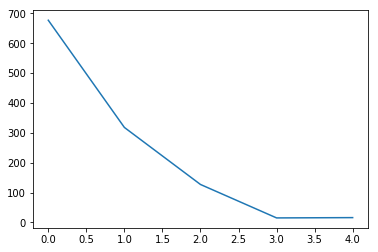

Real Percentage of gain: 13.260104680895989
Percentage of gain: 0.1587076197870573
Total gain: 183.14859323426413
000000000000000000000000000000000000000000000000
Percentile:  0
[[158 167]
 [155 196]]
0.5236686390532544
Percentile:  1
[[ 78  54]
 [ 76 111]]
0.5924764890282131
Percentile:  2
[[ 3 20]
 [26 77]]
0.6349206349206349
Percentile:  3
[[5 3]
 [1 6]]
0.7333333333333333
Percentile:  4
[[ 3 13]
 [ 0  0]]
0.1875
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.554978354978355
0.5866551126516465
F1,score 0.26145251396648045
G-score: 0.3690908929905168
Accuracy 0.427209705372617
Window: 28
[[376 101]
 [560 117]]
Vol pos 0.835530106839931
Vol neg 0.8537679735220824


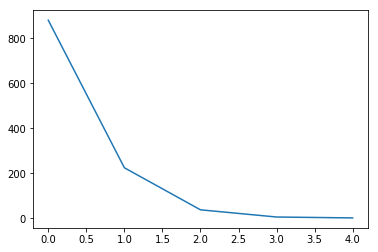

Real Percentage of gain: -21.451203072020736
Percentage of gain: -0.13208343832409924
Total gain: -152.42428782601053
000000000000000000000000000000000000000000000000
Percentile:  0
[[304  62]
 [437  78]]
0.4335981838819523
Percentile:  1
[[ 66  27]
 [105  27]]
0.41333333333333333
Percentile:  2
[[ 0 11]
 [16 11]]
0.2894736842105263
Percentile:  3
[[4 1]
 [0 1]]
0.8333333333333334
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5322510822510822
0.58578856152513
F1,score 0.5140425531914893
G-score: 0.5124710481843384
Accuracy 0.5051993067590987
Window: 28
[[281 197]
 [374 302]]
Vol pos 1.3043190836277052
Vol neg 1.2830771120786095


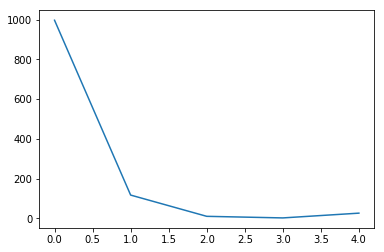

Real Percentage of gain: -6.301315013115352
Percentage of gain: 0.02407365230335025
Total gain: 27.780994758066186
000000000000000000000000000000000000000000000000
Percentile:  0
[[275 168]
 [313 241]]
0.5175526579739218
Percentile:  1
[[ 5 20]
 [52 40]]
0.38461538461538464
Percentile:  2
[[1 9]
 [0 0]]
0.1
Percentile:  3
[[2]]
1.0
Percentile:  4
[[ 0  0]
 [ 8 18]]
0.6923076923076923
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5556277056277056
0.5424610051993067
F1,score 0.30192962542565266
G-score: 0.40418920417283694
Accuracy 0.46707105719237435
Window: 28
[[406 122]
 [493 133]]
Vol pos 1.2773618310221742
Vol neg 1.1714928277903507


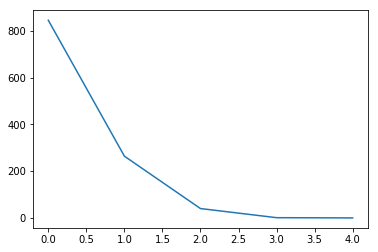

Real Percentage of gain: -10.858428558265725
Percentage of gain: -0.027703693388313525
Total gain: -31.970062170113803
000000000000000000000000000000000000000000000000
Percentile:  0
[[286  91]
 [381  87]]
0.4414201183431953
Percentile:  1
[[ 92  24]
 [103  45]]
0.5189393939393939
Percentile:  2
[[27  7]
 [ 6  0]]
0.675
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5869235765317168
0.5233968804159446
F1,score 0.49049773755656106
G-score: 0.510928137520154
Accuracy 0.5121317157712305
Window: 28
[[320 230]
 [333 271]]
Vol pos 1.0032881059573628
Vol neg 0.8518498782930097


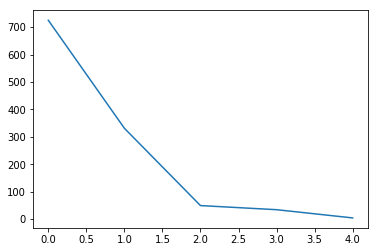

Real Percentage of gain: 34.2336225323778
Percentage of gain: 0.09822512057351555
Total gain: 113.35178914183695
000000000000000000000000000000000000000000000000
Percentile:  0
[[181 146]
 [228 170]]
0.48413793103448277
Percentile:  1
[[99 76]
 [82 74]]
0.5226586102719033
Percentile:  2
[[15  4]
 [ 8 22]]
0.7551020408163265
Percentile:  3
[[21  3]
 [10  0]]
0.6176470588235294
Percentile:  4
[[3 1]
 [0 0]]
0.75
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4684996752543841
0.5051993067590987
F1,score 0.3705308775731311
G-score: 0.45442137372140196
Accuracy 0.4965337954939341
Window: 28
[[402 169]
 [412 171]]
Vol pos 1.3345032502778207
Vol neg 1.5719386376358646


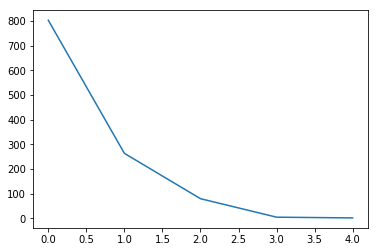

Real Percentage of gain: 5.484922575387132
Percentage of gain: -0.12879201564752685
Total gain: -148.625986057246
000000000000000000000000000000000000000000000000
Percentile:  0
[[312  78]
 [308 105]]
0.5193026151930261
Percentile:  1
[[62 79]
 [73 49]]
0.4220532319391635
Percentile:  2
[[28 10]
 [27 14]]
0.5316455696202531
Percentile:  3
[[0 2]
 [0 2]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5742424242424242
0.5805892547660312
F1,score 0.4120603015075377
G-score: 0.47969759397995904
Accuracy 0.4930675909878683
Window: 28
[[364 120]
 [465 205]]
Vol pos 1.4489473660971615
Vol neg 1.42751490939003


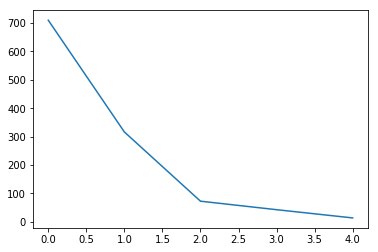

Real Percentage of gain: -4.516847119965313
Percentage of gain: -0.009224584648078519
Total gain: -10.645170683882611
000000000000000000000000000000000000000000000000
Percentile:  0
[[235  81]
 [271 124]]
0.5049226441631505
Percentile:  1
[[ 92  30]
 [146  46]]
0.4394904458598726
Percentile:  2
[[17  5]
 [27 24]]
0.5616438356164384
Percentile:  3
[[18  3]
 [15  5]]
0.5609756097560976
Percentile:  4
[[2 1]
 [4 6]]
0.6153846153846154
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.5667893483437974
0.610051993067591
F1,score 0.2604951560818084
G-score: 0.36352823518645394
Accuracy 0.40467937608318894
Window: 28
[[346 104]
 [583 121]]
Vol pos 1.377083305141867
Vol neg 1.7305914435215495


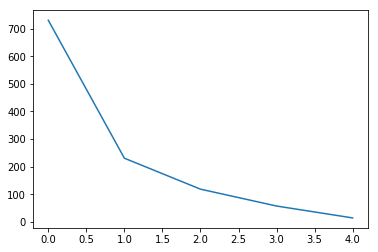

Real Percentage of gain: -90.02442091928957
Percentage of gain: -0.47297956516295725
Total gain: -545.8184181980527
000000000000000000000000000000000000000000000000
Percentile:  0
[[276  75]
 [318  60]]
0.4609053497942387
Percentile:  1
[[ 44  18]
 [136  33]]
0.3333333333333333
Percentile:  2
[[13  2]
 [86 18]]
0.2605042016806723
Percentile:  3
[[ 7  4]
 [40  7]]
0.2413793103448276
Percentile:  4
[[6 4]
 [3 2]]
0.5333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
1.6778197592411772
0.0027997872161690247
Diff in tren train and test
0.5544611819235226
0.6125290023201856
F1,score 0.5693950177935944
G-score: 0.32441340499409965
Accuracy 0.4385150812064965
Window: 28
[[ 29 138]
 [104 160]]
Vol pos 0.4295670101780461
Vol neg 0.5588254571696648


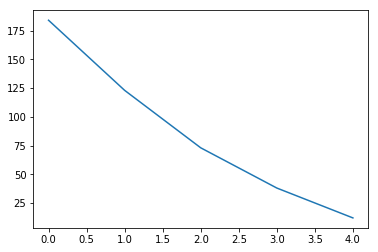

Real Percentage of gain: -10.278897845556616
Percentage of gain: -0.12540045408679387
Total gain: -54.047595711408164
000000000000000000000000000000000000000000000000
Percentile:  0
[[14 58]
 [32 80]]
0.5108695652173914
Percentile:  1
[[ 6 41]
 [27 48]]
0.4426229508196721
Percentile:  2
[[ 8 19]
 [26 20]]
0.3835616438356164
Percentile:  3
[[ 1 10]
 [18  9]]
0.2631578947368421
Percentile:  4
[[ 0 10]
 [ 1  2]]
0.15384615384615385
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5733766233766234
0.6559792027729636
F1,score 0.5795860099928622
G-score: 0.46346654013462113
Accuracy 0.4896013864818024
Window: 28
[[159 238]
 [351 406]]
Vol pos 0.9566422090924477
Vol neg 1.2798686406841828


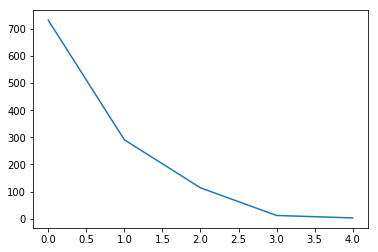

Real Percentage of gain: 18.355577613800037
Percentage of gain: -0.18486982775195035
Total gain: -213.3397812257507
000000000000000000000000000000000000000000000000
Percentile:  0
[[120 107]
 [211 294]]
0.5655737704918032
Percentile:  1
[[24 89]
 [89 89]]
0.38831615120274915
Percentile:  2
[[ 9 36]
 [51 18]]
0.23684210526315788
Percentile:  3
[[3 5]
 [0 4]]
0.5833333333333334
Percentile:  4
[[2 1]
 [0 0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5050876813163022
0.6074523396880416
F1,score 0.526742301458671
G-score: 0.5007449898283401
Accuracy 0.49393414211438474
Window: 28
[[245 208]
 [376 325]]
Vol pos 1.0612859615389878
Vol neg 1.0160417556310977


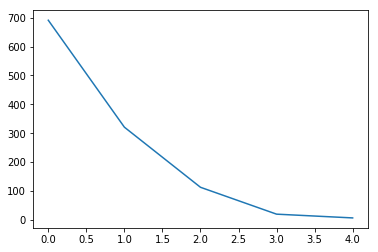

Real Percentage of gain: -4.726619185321337
Percentage of gain: 0.010021328239741747
Total gain: 11.564612788661975
000000000000000000000000000000000000000000000000
Percentile:  0
[[166 111]
 [245 169]]
0.48480463096960924
Percentile:  1
[[ 54  52]
 [111 104]]
0.49221183800623053
Percentile:  2
[[16 27]
 [19 51]]
0.5929203539823009
Percentile:  3
[[ 4 15]
 [ 0  1]]
0.25
Percentile:  4
[[5 2]
 [0 0]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6269755358302663
0.5883882149046794
F1,score 0.5385934819897084
G-score: 0.5422338222776765
Accuracy 0.5337954939341422
Window: 28
[[302 173]
 [365 314]]
Vol pos 0.9938897230685713
Vol neg 0.9023088390293533


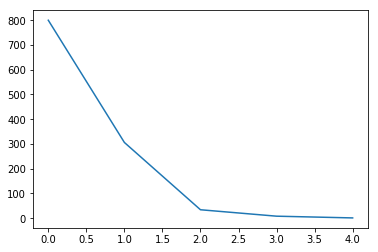

Real Percentage of gain: 6.362383639961882
Percentage of gain: 0.1098734090229184
Total gain: 126.79391401244784
000000000000000000000000000000000000000000000000
Percentile:  0
[[235 141]
 [238 186]]
0.52625
Percentile:  1
[[ 66  32]
 [110  98]]
0.5359477124183006
Percentile:  2
[[ 1  0]
 [14 19]]
0.5882352941176471
Percentile:  3
[[8]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48148949989175144
0.6117850953206239
F1,score 0.5843164469118668
G-score: 0.42233015283391206
Accuracy 0.4809358752166378
Window: 28
[[134 314]
 [285 421]]
Vol pos 1.3661576696131141
Vol neg 1.0742917891181614


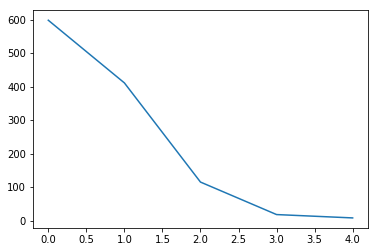

Real Percentage of gain: -44.31558645075744
Percentage of gain: 0.09940790723873456
Total gain: 114.7167249534997
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 46 162]
 [165 225]]
0.4531772575250836
Percentile:  1
[[ 53 134]
 [ 96 128]]
0.44038929440389296
Percentile:  2
[[27 14]
 [23 51]]
0.6782608695652174
Percentile:  3
[[6 4]
 [0 8]]
0.7777777777777778
Percentile:  4
[[2 0]
 [0 6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5857142857142857
0.6317157712305026
F1,score 0.6545708304256803
G-score: 0.5362965370309647
Accuracy 0.57105719237435
Window: 28
[[190 235]
 [260 469]]
Vol pos 1.4017258095655347
Vol neg 1.2742917963152616


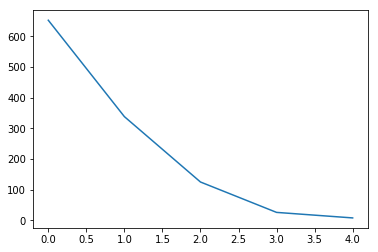

Real Percentage of gain: 42.202898550724676
Percentage of gain: 0.2538673044433561
Total gain: 292.9628693276329
000000000000000000000000000000000000000000000000
Percentile:  0
[[116 121]
 [173 242]]
0.549079754601227
Percentile:  1
[[ 34  70]
 [ 72 162]]
0.5798816568047337
Percentile:  2
[[27 30]
 [13 55]]
0.656
Percentile:  3
[[10  8]
 [ 2  6]]
0.6153846153846154
Percentile:  4
[[2 6]
 [0 0]]
0.25
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4744478129060199
0.5433275563258232
F1,score 0.7011156782149149
G-score: 0.29448874838702943
Accuracy 0.5589254766031195
Window: 28
[[ 48 479]
 [ 30 597]]
Vol pos 0.9455358561387481
Vol neg 1.170845524528149


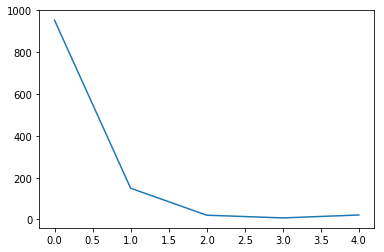

Real Percentage of gain: 86.24184730349741
Percentage of gain: 0.012053947335064777
Total gain: 13.910255224664752
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 40 394]
 [ 29 489]]
0.555672268907563
Percentile:  1
[[  7  41]
 [  0 101]]
0.7248322147651006
Percentile:  2
[[ 0 16]
 [ 0  4]]
0.2
Percentile:  3
[[1 6]
 [0 0]]
0.14285714285714285
Percentile:  4
[[ 0 21]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5541125541125541
0.5953206239168111
F1,score 0.4122621564482029
G-score: 0.4949177386889374
Accuracy 0.5181975736568457
Window: 28
[[403  64]
 [492 195]]
Vol pos 0.6204187826292373
Vol neg 0.8202415505537388


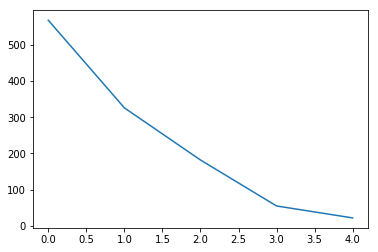

Real Percentage of gain: 16.825822617366896
Percentage of gain: -0.07369486143465759
Total gain: -85.04387009559485
000000000000000000000000000000000000000000000000
Percentile:  0
[[213  42]
 [205 110]]
0.5666666666666667
Percentile:  1
[[112  11]
 [131  71]]
0.563076923076923
Percentile:  2
[[64 10]
 [94 13]]
0.425414364640884
Percentile:  3
[[12  1]
 [41  0]]
0.2222222222222222
Percentile:  4
[[ 2  0]
 [20  0]]
0.09090909090909091
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5054112554112554
0.5771230502599654
F1,score 0.3985032740879327
G-score: 0.44192737865482606
Accuracy 0.44280762564991333
Window: 28
[[298 190]
 [453 213]]
Vol pos 1.3201061289379648
Vol neg 1.1896648031540682


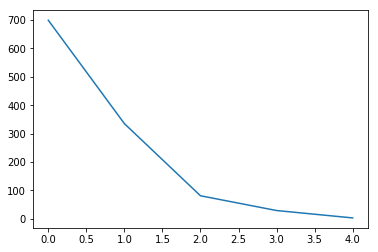

Real Percentage of gain: -30.349353188929
Percentage of gain: -0.07831909578922518
Total gain: -90.38023654076585
000000000000000000000000000000000000000000000000
Percentile:  0
[[211  99]
 [284 105]]
0.4520743919885551
Percentile:  1
[[ 74  81]
 [126  54]]
0.382089552238806
Percentile:  2
[[13 10]
 [33 25]]
0.4691358024691358
Percentile:  3
[[ 0  0]
 [ 4 25]]
0.8620689655172413
Percentile:  4
[[0 0]
 [1 2]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4776703194733637
Mean gain over portfolio :  -41.26587700133419
Real mean gain over portfolio -4.252681783980501


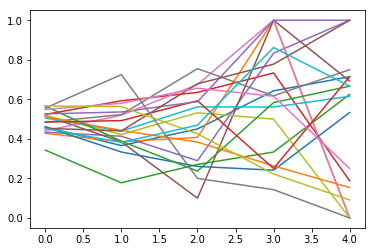

In [5]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

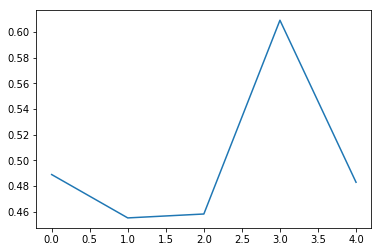

In [6]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.37671232876712324
G-score: 0.4681218029644211
Accuracy 0.5176678445229682
Window: 140
[[421  87]
 [459 165]]
Vol pos 3.5493251667710886
Vol neg 2.736527090555666


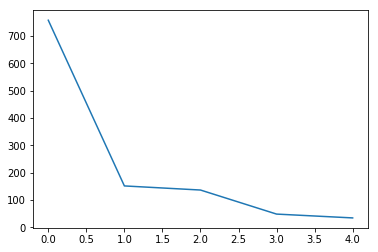

Real Percentage of gain: -8.895531400056193
Percentage of gain: 0.5174564984845091
Total gain: 585.7607562844644
000000000000000000000000000000000000000000000000
Percentile:  0
[[320  64]
 [339  36]]
0.46903820816864294
Percentile:  1
[[44 22]
 [63 21]]
0.43333333333333335
Percentile:  2
[[57  1]
 [16 63]]
0.8759124087591241
Percentile:  3
[[ 0  0]
 [ 8 41]]
0.8367346938775511
Percentile:  4
[[ 0  0]
 [31  4]]
0.11428571428571428
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.1919191919191919
G-score: 0.3190885060756048
Accuracy 0.29328621908127206
Window: 140
[[237  14]
 [786  95]]
Vol pos 2.470846916089753
Vol neg 2.3118133107755194


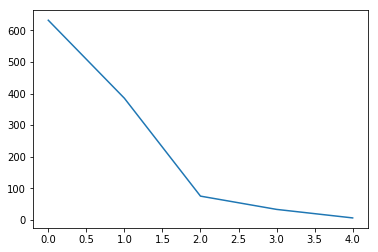

Real Percentage of gain: -202.9965843123877
Percentage of gain: -0.9091249756878247
Total gain: -1029.1294724786176
000000000000000000000000000000000000000000000000
Percentile:  0
[[198   1]
 [411  21]]
0.347068145800317
Percentile:  1
[[ 32   4]
 [314  35]]
0.17402597402597403
Percentile:  2
[[ 7  9]
 [56  3]]
0.13333333333333333
Percentile:  3
[[ 0  0]
 [ 4 29]]
0.8787878787878788
Percentile:  4
[[6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.4005681818181818
G-score: 0.5004438527283257
Accuracy 0.35276073619631904
Window: 140
[[ 89   0]
 [422 141]]
Vol pos 1.6553699326363078
Vol neg 2.328303271977751


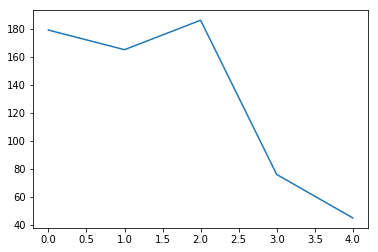

Real Percentage of gain: -85.23344211291649
Percentage of gain: -0.9230197795525464
Total gain: -601.8088962682602
000000000000000000000000000000000000000000000000
Percentile:  0
[[70  0]
 [87 22]]
0.5139664804469274
Percentile:  1
[[ 19   0]
 [122  24]]
0.2606060606060606
Percentile:  2
[[  0   0]
 [104  82]]
0.44086021505376344
Percentile:  3
[[ 0  0]
 [63 13]]
0.17105263157894737
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.6922576447625243
G-score: 0.4685057261417395
Accuracy 0.5821554770318021
Window: 140
[[127 327]
 [146 532]]
Vol pos 3.115492855727286
Vol neg 2.709957279986021


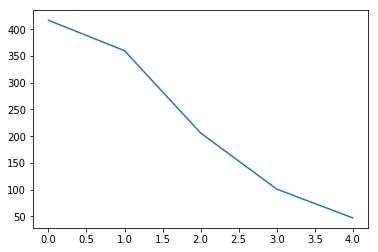

Real Percentage of gain: 76.44963211365537
Percentage of gain: 0.6813604226951356
Total gain: 771.2999984908936
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 98 133]
 [ 51 134]]
0.5576923076923077
Percentile:  1
[[  5 106]
 [ 43 206]]
0.5861111111111111
Percentile:  2
[[24 73]
 [22 87]]
0.5388349514563107
Percentile:  3
[[ 0 14]
 [27 60]]
0.594059405940594
Percentile:  4
[[ 0  0]
 [ 3 44]]
0.9361702127659575
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.2532544378698225
G-score: 0.3742238855746947
Accuracy 0.44257950530035334
Window: 140
[[394  33]
 [598 107]]
Vol pos 1.4379124240459935
Vol neg 1.669755543704712


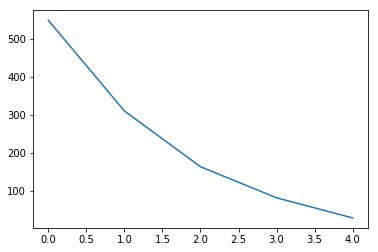

Real Percentage of gain: -32.669362855236464
Percentage of gain: -0.29436539189985034
Total gain: -333.2216236306306
000000000000000000000000000000000000000000000000
Percentile:  0
[[272  28]
 [222  27]]
0.5446265938069217
Percentile:  1
[[ 71   3]
 [213  23]]
0.3032258064516129
Percentile:  2
[[ 22   1]
 [105  35]]
0.3496932515337423
Percentile:  3
[[19  1]
 [46 15]]
0.41975308641975306
Percentile:  4
[[10  0]
 [11  7]]
0.6071428571428571
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.5777126099706744
G-score: 0.5284669788799888
Accuracy 0.4911660777385159
Window: 140
[[162 101]
 [475 394]]
Vol pos 3.5541123272417927
Vol neg 2.6217503824602892


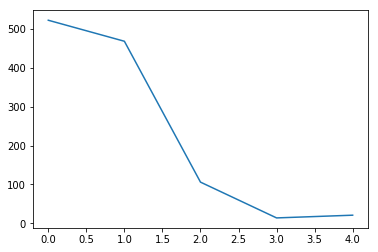

Real Percentage of gain: -51.537726234867726
Percentage of gain: 0.41162388131564503
Total gain: 465.95823364931016
000000000000000000000000000000000000000000000000
Percentile:  0
[[153  59]
 [251  59]]
0.4061302681992337
Percentile:  1
[[  8  29]
 [197 234]]
0.5170940170940171
Percentile:  2
[[ 1 12]
 [26 66]]
0.638095238095238
Percentile:  3
[[14]]
1.0
Percentile:  4
[[ 0  0]
 [ 1 20]]
0.9523809523809523
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.15025906735751296
G-score: 0.2811697633249741
Accuracy 0.4204946996466431
Window: 140
[[418  31]
 [625  58]]
Vol pos 2.5836671163372755
Vol neg 2.1533494808135467


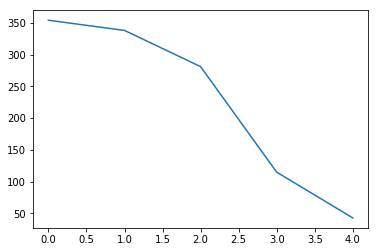

Real Percentage of gain: -73.01059387143356
Percentage of gain: -0.16145910957344833
Total gain: -182.77171203714352
000000000000000000000000000000000000000000000000
Percentile:  0
[[101  15]
 [215  23]]
0.3502824858757062
Percentile:  1
[[111   3]
 [201  26]]
0.40175953079178883
Percentile:  2
[[117  10]
 [146   5]]
0.43884892086330934
Percentile:  3
[[60  3]
 [51  0]]
0.5263157894736842
Percentile:  4
[[29  0]
 [10  4]]
0.7674418604651163
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.009615384615384614
G-score: 0.0695048046856916
Accuracy 0.4540636042402827
Window: 140
[[511   0]
 [618   3]]
Vol pos 2.1557841861012474
Vol neg 1.5848931460838347


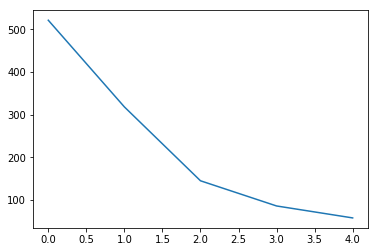

Real Percentage of gain: 54.422670690305516
Percentage of gain: 0.113612285668049
Total gain: 128.60910737623146
000000000000000000000000000000000000000000000000
Percentile:  0
[[231   0]
 [287   3]]
0.4491362763915547
Percentile:  1
[[105   0]
 [213   0]]
0.330188679245283
Percentile:  2
[[64  0]
 [81  0]]
0.4413793103448276
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.6461538461538461
G-score: 0.34612238799262424
Accuracy 0.5123674911660777
Window: 140
[[ 76 465]
 [ 87 504]]
Vol pos 2.840763340081753
Vol neg 2.87706536802868


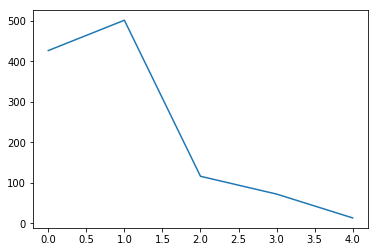

Real Percentage of gain: 109.22206241909977
Percentage of gain: 0.05256418206323808
Total gain: 59.50265409558551
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 19 208]
 [ 40 160]]
0.41920374707259955
Percentile:  1
[[ 37 161]
 [ 29 275]]
0.6215139442231076
Percentile:  2
[[10 32]
 [14 60]]
0.603448275862069
Percentile:  3
[[10 50]
 [ 3  9]]
0.2638888888888889
Percentile:  4
[[ 0 13]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.3481081081081081
G-score: 0.4355935609701779
Accuracy 0.4673144876325088
Window: 140
[[368 108]
 [495 161]]
Vol pos 3.7084964087129144
Vol neg 3.8274466800059392


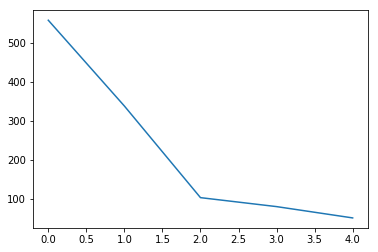

Real Percentage of gain: -63.437295056611006
Percentage of gain: -0.3057912966735422
Total gain: -346.1557478344498
000000000000000000000000000000000000000000000000
Percentile:  0
[[241  71]
 [220  26]]
0.478494623655914
Percentile:  1
[[108  10]
 [153  67]]
0.5177514792899408
Percentile:  2
[[15 16]
 [64  8]]
0.22330097087378642
Percentile:  3
[[ 4 11]
 [44 21]]
0.3125
Percentile:  4
[[ 0  0]
 [13 38]]
0.7450980392156863
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.1328976034858388
G-score: 0.2600817040704582
Accuracy 0.2968197879858657
Window: 140
[[275  22]
 [774  61]]
Vol pos 3.731888438817757
Vol neg 4.5945729620787255


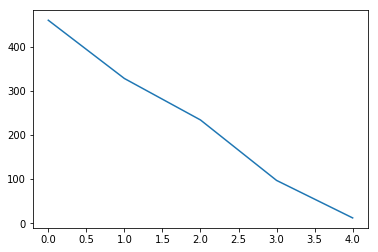

Real Percentage of gain: -367.37823273669045
Percentage of gain: -2.1231144543921374
Total gain: -2403.3655623718996
000000000000000000000000000000000000000000000000
Percentile:  0
[[167   3]
 [281   9]]
0.3826086956521739
Percentile:  1
[[ 59   1]
 [258  10]]
0.21036585365853658
Percentile:  2
[[ 29   9]
 [172  23]]
0.22317596566523606
Percentile:  3
[[18  9]
 [53 17]]
0.36082474226804123
Percentile:  4
[[1 0]
 [9 2]]
0.25
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.7003367003367003
G-score: 0.361006668271295
Accuracy 0.5647921760391198
Window: 140
[[ 23 110]
 [ 68 208]]
Vol pos 1.2699638532841204
Vol neg 0.876793766439772


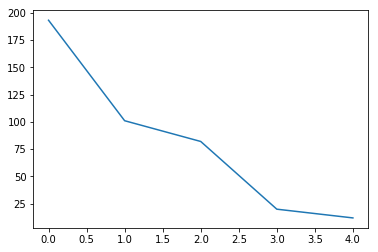

Real Percentage of gain: 81.22873704293299
Percentage of gain: 0.3356781410326464
Total gain: 137.29235968235238
000000000000000000000000000000000000000000000000
Percentile:  0
[[23 76]
 [24 73]]
0.4897959183673469
Percentile:  1
[[ 0 26]
 [21 51]]
0.5204081632653061
Percentile:  2
[[ 0  7]
 [18 57]]
0.6951219512195121
Percentile:  3
[[ 0  0]
 [ 5 14]]
0.7368421052631579
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.6369337979094076
G-score: 0.4922661419829662
Accuracy 0.5397526501766784
Window: 140
[[154 239]
 [282 457]]
Vol pos 3.1473441581491244
Vol neg 2.042025766361655


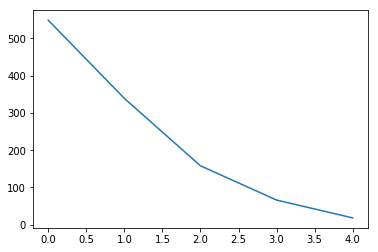

Real Percentage of gain: 46.72493594984525
Percentage of gain: 0.758950403140188
Total gain: 859.1318563546929
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84 183]
 [110 172]]
0.4663023679417122
Percentile:  1
[[ 22  56]
 [125 136]]
0.46607669616519176
Percentile:  2
[[25  0]
 [39 94]]
0.7531645569620253
Percentile:  3
[[23  0]
 [ 8 35]]
0.8787878787878788
Percentile:  4
[[18]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.7198515769944341
G-score: 0.4670050716658883
Accuracy 0.5998233215547704
Window: 140
[[ 97 221]
 [232 582]]
Vol pos 1.8028051671883991
Vol neg 2.0398861161511697


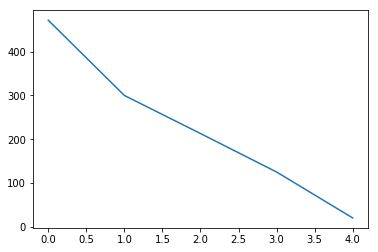

Real Percentage of gain: 162.1916025715351
Percentage of gain: 0.2650497331311335
Total gain: 300.03629790444313
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 65  98]
 [ 86 223]]
0.6101694915254238
Percentile:  1
[[ 21  34]
 [ 74 171]]
0.64
Percentile:  2
[[  6  20]
 [ 58 129]]
0.6338028169014085
Percentile:  3
[[ 4 52]
 [14 55]]
0.472
Percentile:  4
[[ 1 16]
 [ 0  3]]
0.2
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5564168819982773
G-score: 0.5807637145440272
Accuracy 0.5450530035335689
Window: 140
[[294  75]
 [440 323]]
Vol pos 2.375394123725857
Vol neg 2.6385752801658158


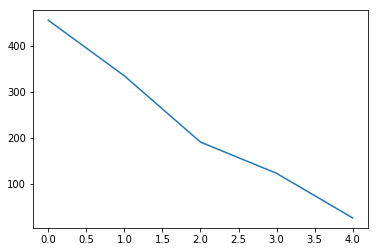

Real Percentage of gain: -49.60905470448835
Percentage of gain: 0.09430380305075847
Total gain: 106.75190505345859
000000000000000000000000000000000000000000000000
Percentile:  0
[[190  18]
 [182  65]]
0.5604395604395604
Percentile:  1
[[103  27]
 [102 103]]
0.6149253731343284
Percentile:  2
[[ 1 13]
 [90 88]]
0.4635416666666667
Percentile:  3
[[ 0 10]
 [61 51]]
0.4180327868852459
Percentile:  4
[[ 0  7]
 [ 4 15]]
0.5769230769230769
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.6888297872340425
G-score: 0.5051876958013124
Accuracy 0.5865724381625441
Window: 140
[[146 265]
 [203 518]]
Vol pos 3.5101129916910505
Vol neg 2.6243187430903285


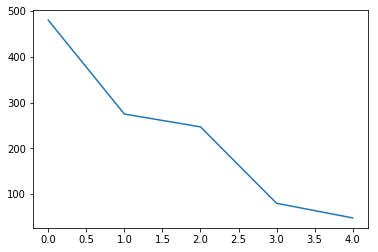

Real Percentage of gain: 113.17673484148375
Percentage of gain: 0.9739698363220703
Total gain: 1102.5338547165836
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 63 143]
 [ 64 210]]
0.56875
Percentile:  1
[[30 95]
 [60 90]]
0.43636363636363634
Percentile:  2
[[  3  22]
 [ 69 153]]
0.631578947368421
Percentile:  3
[[14  3]
 [10 53]]
0.8375
Percentile:  4
[[35  2]
 [ 0 11]]
0.9583333333333334
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.5626822157434402
G-score: 0.46527223502590775
Accuracy 0.46996466431095407
Window: 140
[[146 175]
 [425 386]]
Vol pos 3.297645145295634
Vol neg 2.5493501305735893


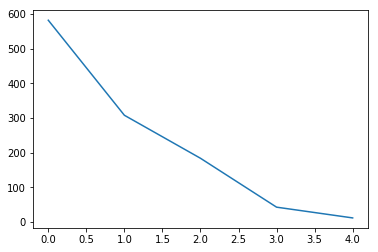

Real Percentage of gain: -108.73260185944768
Percentage of gain: 0.19853104147802436
Total gain: 224.73713895312358
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 41  96]
 [241 204]]
0.4209621993127148
Percentile:  1
[[ 30  21]
 [156 101]]
0.4253246753246753
Percentile:  2
[[71 49]
 [27 37]]
0.5869565217391305
Percentile:  3
[[ 4  9]
 [ 1 29]]
0.7674418604651163
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.14553472987872104
G-score: 0.24486484273735828
Accuracy 0.31537102473498235
Window: 140
[[291 281]
 [494  66]]
Vol pos 2.0126901925681673
Vol neg 3.77855824493649


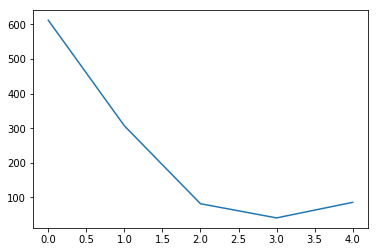

Real Percentage of gain: -363.52820132421164
Percentage of gain: -1.952166290705781
Total gain: -2209.852241078944
000000000000000000000000000000000000000000000000
Percentile:  0
[[208 121]
 [219  64]]
0.4444444444444444
Percentile:  1
[[ 60  43]
 [202   2]]
0.20195439739413681
Percentile:  2
[[ 1 11]
 [70  0]]
0.012195121951219513
Percentile:  3
[[ 5 36]
 [ 0  0]]
0.12195121951219512
Percentile:  4
[[17 69]
 [ 0  0]]
0.19767441860465115
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.321353065539112
G-score: 0.4280802746445538
Accuracy 0.43286219081272087
Window: 140
[[338  28]
 [614 152]]
Vol pos 1.2991572634959474
Vol neg 1.5179612085438252


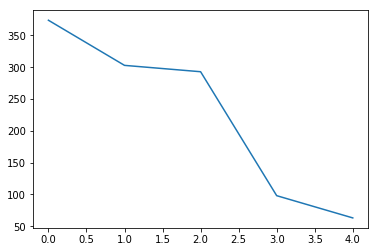

Real Percentage of gain: -109.9111687717022
Percentage of gain: -0.29853713495770456
Total gain: -337.94403677212154
000000000000000000000000000000000000000000000000
Percentile:  0
[[165  23]
 [160  25]]
0.5093833780160858
Percentile:  1
[[ 92   5]
 [153  53]]
0.47854785478547857
Percentile:  2
[[ 68   0]
 [194  31]]
0.3378839590443686
Percentile:  3
[[12  0]
 [79  7]]
0.19387755102040816
Percentile:  4
[[ 0  0]
 [28 35]]
0.5555555555555556
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.5967878275570583
G-score: 0.6212050313329075
Accuracy 0.5786219081272085
Window: 140
[[302  54]
 [423 353]]
Vol pos 3.989800749198275
Vol neg 2.443902366755881


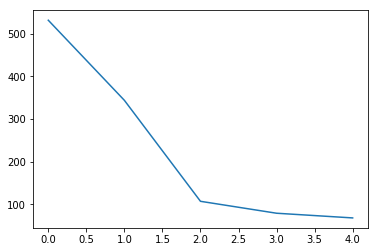

Real Percentage of gain: 80.74917268351382
Percentage of gain: 1.2787792065214798
Total gain: 1447.5780617823152
000000000000000000000000000000000000000000000000
Percentile:  0
[[194  39]
 [205  94]]
0.5413533834586466
Percentile:  1
[[ 44   4]
 [200  96]]
0.4069767441860465
Percentile:  2
[[ 7 10]
 [18 72]]
0.7383177570093458
Percentile:  3
[[10  1]
 [ 0 68]]
0.9873417721518988
Percentile:  4
[[46  0]
 [ 0 22]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.4731744653997579
Mean gain over portfolio :  -62.75285340643061
Real mean gain over portfolio -39.638712346383905


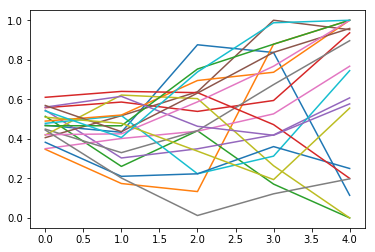

In [7]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

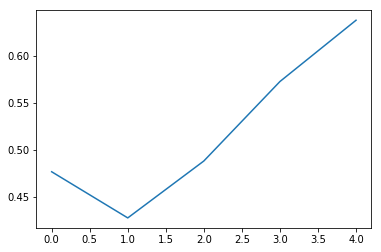

In [8]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5548862115127176
0.6080357142857142
F1,score 0.5686839577329491
G-score: 0.6093343668677667
Accuracy 0.5991071428571428
Window: 200
[[375  64]
 [385 296]]
Vol pos 4.239495266530299
Vol neg 4.121199141010276


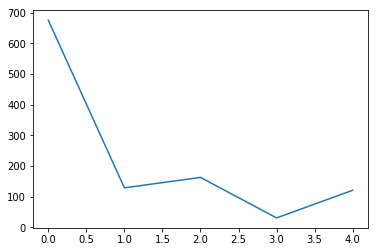

Real Percentage of gain: 109.86233324442038
Percentage of gain: 0.8877525977930503
Total gain: 994.2829095282164
000000000000000000000000000000000000000000000000
Percentile:  0
[[227  53]
 [236 158]]
0.5712166172106825
Percentile:  1
[[63 11]
 [24 31]]
0.7286821705426356
Percentile:  2
[[77  0]
 [63 23]]
0.6134969325153374
Percentile:  3
[[ 8  0]
 [ 7 16]]
0.7741935483870968
Percentile:  4
[[ 0  0]
 [53 68]]
0.5619834710743802
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125641597857622
0.8303571428571429
F1,score 0.20901246404602108
G-score: 0.33872827178324394
Accuracy 0.26339285714285715
Window: 200
[[186   4]
 [821 109]]
Vol pos 2.1490355119829196
Vol neg 3.143011432178223


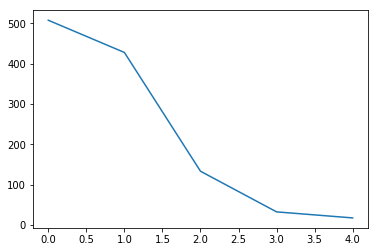

Real Percentage of gain: -280.3642434948289
Percentage of gain: -1.7491240674214936
Total gain: -1959.018955512073
000000000000000000000000000000000000000000000000
Percentile:  0
[[184   4]
 [278  42]]
0.4448818897637795
Percentile:  1
[[  2   0]
 [392  34]]
0.08411214953271028
Percentile:  2
[[  0   0]
 [121  12]]
0.09022556390977443
Percentile:  3
[[ 0  0]
 [27  5]]
0.15625
Percentile:  4
[[ 0  0]
 [ 2 15]]
0.8823529411764706
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31081608746583367
0.9765625
F1,score 0.10318664643399089
G-score: 0.23323807579381203
Accuracy 0.0765625
Window: 200
[[ 15   0]
 [591  34]]
Vol pos 1.6428537432560752
Vol neg 2.810341998456546


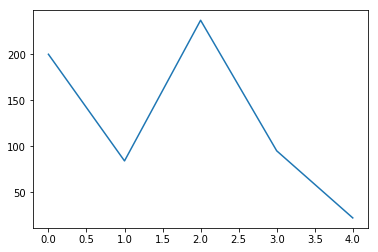

Real Percentage of gain: -168.36566848717464
Percentage of gain: -2.4693941994816737
Total gain: -1580.4122876682711
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15   0]
 [173  12]]
0.135
Percentile:  1
[[ 0  0]
 [77  7]]
0.08333333333333333
Percentile:  2
[[  0   0]
 [222  15]]
0.06329113924050633
Percentile:  3
[[ 0  0]
 [95  0]]
0.0
Percentile:  4
[[ 0  0]
 [22  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6355724168712341
0.6625
F1,score 0.7225964482547459
G-score: 0.4024607348633138
Accuracy 0.5955357142857143
Window: 200
[[ 77 301]
 [152 590]]
Vol pos 4.046882785236136
Vol neg 2.5367997063845373


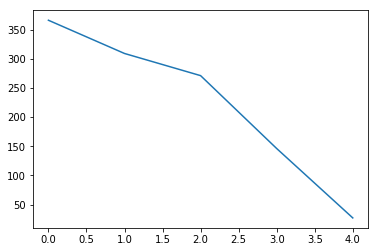

Real Percentage of gain: 111.83884749734413
Percentage of gain: 1.3840183488931317
Total gain: 1550.1005507603074
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 27 151]
 [ 74 113]]
0.3835616438356164
Percentile:  1
[[ 22  76]
 [ 39 172]]
0.627831715210356
Percentile:  2
[[ 26  66]
 [ 27 152]]
0.6568265682656826
Percentile:  3
[[  2   8]
 [ 12 124]]
0.863013698630137
Percentile:  4
[[27]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6749219098616689
0.6848214285714286
F1,score 0.514379622021364
G-score: 0.4997053621065213
Accuracy 0.47232142857142856
Window: 200
[[216 137]
 [454 313]]
Vol pos 1.854512239787581
Vol neg 1.766158838214447


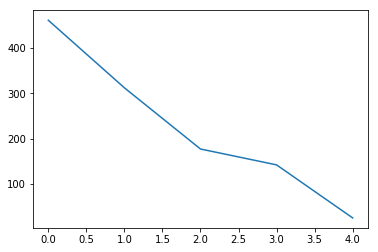

Real Percentage of gain: -42.081811620845016
Percentage of gain: -0.05603830226527486
Total gain: -62.762898537107844
000000000000000000000000000000000000000000000000
Percentile:  0
[[128  77]
 [164  92]]
0.4772234273318872
Percentile:  1
[[ 70  54]
 [112  76]]
0.46794871794871795
Percentile:  2
[[ 17   6]
 [101  53]]
0.3954802259887006
Percentile:  3
[[ 1  0]
 [68 73]]
0.5211267605633803
Percentile:  4
[[ 0  0]
 [ 7 18]]
0.72
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5437304774654173
0.8705357142857143
F1,score 0.6329612606697307
G-score: 0.5189801602370914
Accuracy 0.5008928571428571
Window: 200
[[ 79  66]
 [493 482]]
Vol pos 4.142248764224598
Vol neg 2.9483701796011434


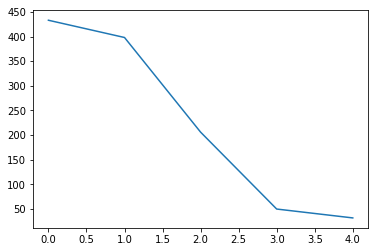

Real Percentage of gain: -16.574327742633983
Percentage of gain: 0.6032702020830001
Total gain: 675.6626263329601
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 74  35]
 [209 116]]
0.4377880184331797
Percentile:  1
[[  5  30]
 [192 170]]
0.44080604534005036
Percentile:  2
[[  0   1]
 [ 88 117]]
0.5679611650485437
Percentile:  3
[[ 0  0]
 [ 3 46]]
0.9387755102040817
Percentile:  4
[[32]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6316376617581437
0.5767857142857142
F1,score 0.26137463697967084
G-score: 0.31285128392473105
Accuracy 0.31875
Window: 200
[[222 252]
 [511 135]]
Vol pos 1.7726067833197687
Vol neg 2.7522916670908777


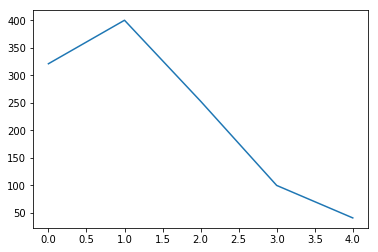

Real Percentage of gain: -206.27924542459627
Percentage of gain: -1.309980286022484
Total gain: -1467.1779203451822
000000000000000000000000000000000000000000000000
Percentile:  0
[[122  48]
 [112  39]]
0.5015576323987538
Percentile:  1
[[ 69 101]
 [171  59]]
0.32
Percentile:  2
[[ 27  58]
 [144  24]]
0.2015810276679842
Percentile:  3
[[ 4 19]
 [66 11]]
0.15
Percentile:  4
[[ 0 25]
 [15  1]]
0.024390243902439025
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858
Diff in tren train and test
0.7139031466190583
0.5776785714285714
F1,score 0.021084337349397592
G-score: 0.10290981673890927
Accuracy 0.41964285714285715
Window: 200
[[463  10]
 [640   7]]
Vol pos 2.5553538077862883
Vol neg 1.8473203456324356


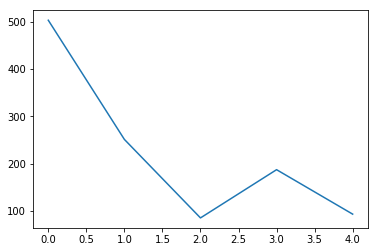

Real Percentage of gain: 112.1654721488745
Percentage of gain: 0.0002304151772073786
Total gain: 0.25806499847226405
000000000000000000000000000000000000000000000000
Percentile:  0
[[222   8]
 [274   2]]
0.4426877470355731
Percentile:  1
[[ 39   0]
 [204   4]]
0.17408906882591094
Percentile:  2
[[12  1]
 [74  1]]
0.14772727272727273
Percentile:  3
[[113   1]
 [ 73   0]]
0.6042780748663101
Percentile:  4
[[76  0]
 [14  0]]
0.8444444444444444
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.0
Diff in tren train and test
0.4478910957375586
0.5348214285714286
F1,score 0.2
G-score: 0.3217680560955163
Accuracy 0.4357142857142857
Window: 200
[[409 112]
 [520  79]]
Vol pos 3.728157499669715
Vol neg 3.100274905162168


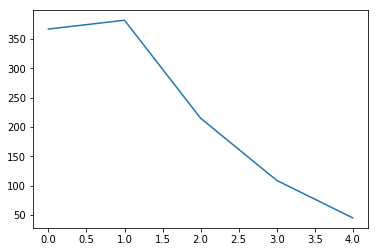

Real Percentage of gain: -208.80732537513788
Percentage of gain: -0.12502935734256185
Total gain: -140.03288022366928
000000000000000000000000000000000000000000000000
Percentile:  0
[[121  17]
 [214  15]]
0.37057220708446864
Percentile:  1
[[131  32]
 [200  19]]
0.39267015706806285
Percentile:  2
[[95 40]
 [51 29]]
0.5767441860465117
Percentile:  3
[[46 20]
 [27 16]]
0.5688073394495413
Percentile:  4
[[16  3]
 [26  0]]
0.35555555555555557
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.0019193489568320964
Diff in tren train and test
0.6510486390004462
0.6419642857142858
F1,score 0.42473118279569894
G-score: 0.4450881817546162
Accuracy 0.42678571428571427
Window: 200
[[241 160]
 [482 237]]
Vol pos 6.4832336767414755
Vol neg 3.32293328955123


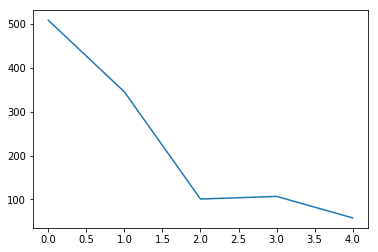

Real Percentage of gain: -173.0607312998828
Percentage of gain: 0.8621986835629781
Total gain: 965.6625255905356
000000000000000000000000000000000000000000000000
Percentile:  0
[[136  78]
 [266  27]]
0.3214990138067061
Percentile:  1
[[ 97  72]
 [151  25]]
0.3536231884057971
Percentile:  2
[[ 8 10]
 [62 21]]
0.2871287128712871
Percentile:  3
[[  0   0]
 [  2 105]]
0.9813084112149533
Percentile:  4
[[58]]
1.0
000000000000000000000000000000000000000000000000
Working on... NFLX
16.219868718627612
0.0
Diff in tren train and test
0.625083686677081
0.7964285714285714
F1,score 0.14447884416924664
G-score: 0.27580066320030705
Accuracy 0.2598214285714286
Window: 200
[[221   7]
 [822  70]]
Vol pos 4.099715719055723
Vol neg 5.797615056995973


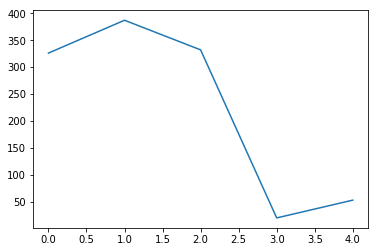

Real Percentage of gain: -609.4761495766312
Percentage of gain: -3.2260764357182556
Total gain: -3613.2056080044463
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 84   4]
 [221  17]]
0.3098159509202454
Percentile:  1
[[ 97   1]
 [252  37]]
0.3462532299741602
Percentile:  2
[[ 40   2]
 [274  16]]
0.1686746987951807
Percentile:  3
[[ 0  0]
 [20  0]]
0.0
Percentile:  4
[[ 0  0]
 [53  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
4.336126439130737
0.0018669255470074874
Diff in tren train and test
0.5384130982367759
0.690176322418136
F1,score 0.8265524625267666
G-score: 0.8392732344378651
Accuracy 0.7959697732997482
Window: 200
[[123   0]
 [ 81 193]]
Vol pos 1.5286501949926354
Vol neg 0.5229267153941559


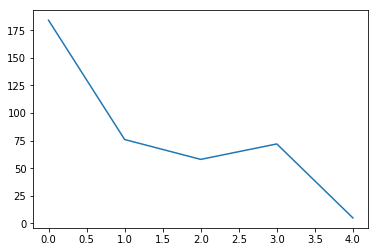

Real Percentage of gain: 283.64309372941096
Percentage of gain: 1.1100664928734159
Total gain: 440.69639767074614
000000000000000000000000000000000000000000000000
Percentile:  0
[[109   0]
 [ 66   9]]
0.6413043478260869
Percentile:  1
[[12  0]
 [11 53]]
0.8552631578947368
Percentile:  2
[[ 1  0]
 [ 4 53]]
0.9310344827586207
Percentile:  3
[[72]]
1.0
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.848536613142013
0.002086767805344401
Diff in tren train and test
0.711958946898706
0.7223214285714286
F1,score 0.36
G-score: 0.4632787974281139
Accuracy 0.42857142857142855
Window: 200
[[300  11]
 [629 180]]
Vol pos 3.7354552806943033
Vol neg 2.7695758113767193


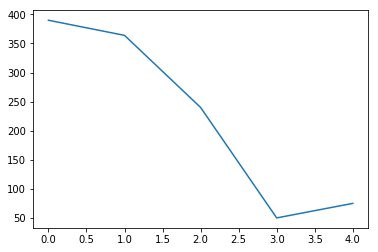

Real Percentage of gain: -96.27421363577126
Percentage of gain: 0.01829465665371909
Total gain: 20.49001545216538
000000000000000000000000000000000000000000000000
Percentile:  0
[[147   0]
 [243   0]]
0.3769230769230769
Percentile:  1
[[110  11]
 [231  12]]
0.33516483516483514
Percentile:  2
[[ 42   0]
 [137  60]]
0.42677824267782427
Percentile:  3
[[ 0  0]
 [ 8 42]]
0.84
Percentile:  4
[[ 0  0]
 [ 9 66]]
0.88
000000000000000000000000000000000000000000000000
Working on... AMGN
5.841163444850075
0.007105975040131699
Diff in tren train and test
0.5219817005132783
0.7839285714285714
F1,score 0.7060317460317459
G-score: 0.5140947179430306
Accuracy 0.5866071428571429
Window: 200
[[101 141]
 [322 556]]
Vol pos 2.5794619789808144
Vol neg 2.05201664199044


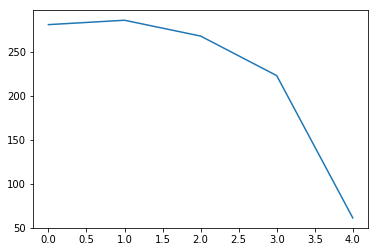

Real Percentage of gain: 142.41839802578798
Percentage of gain: 0.6648417990614477
Total gain: 744.6228149488214
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 29  24]
 [124 108]]
0.4807017543859649
Percentile:  1
[[ 21  22]
 [106 136]]
0.5508771929824562
Percentile:  2
[[ 19  44]
 [ 65 138]]
0.5902255639097744
Percentile:  3
[[ 28  40]
 [ 26 127]]
0.7013574660633484
Percentile:  4
[[ 4 11]
 [ 0 46]]
0.819672131147541
000000000000000000000000000000000000000000000000
Working on... TXN
9.594205774382367
0.0
Diff in tren train and test
0.6786431600089265
0.7205357142857143
F1,score 0.43371212121212127
G-score: 0.5153978650343842
Accuracy 0.4660714285714286
Window: 200
[[293  20]
 [578 229]]
Vol pos 2.966039023379881
Vol neg 3.245300084935623


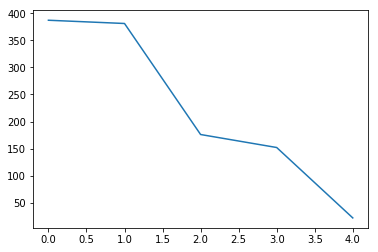

Real Percentage of gain: -167.45124483862364
Percentage of gain: -0.3503723933814326
Total gain: -392.4170805872045
000000000000000000000000000000000000000000000000
Percentile:  0
[[146   8]
 [207  26]]
0.4444444444444444
Percentile:  1
[[138   7]
 [149  87]]
0.5905511811023622
Percentile:  2
[[  9   5]
 [118  44]]
0.30113636363636365
Percentile:  3
[[ 0  0]
 [91 61]]
0.40131578947368424
Percentile:  4
[[ 0  0]
 [11 11]]
0.5
000000000000000000000000000000000000000000000000
Working on... AVGO
9.981040657257227
0.0025934464021118834
Diff in tren train and test
0.4675295692925686
0.7
F1,score 0.6780088216761185
G-score: 0.38079623181592664
Accuracy 0.54375
Window: 200
[[ 71 265]
 [246 538]]
Vol pos 4.564727210941204
Vol neg 3.3985587346501935


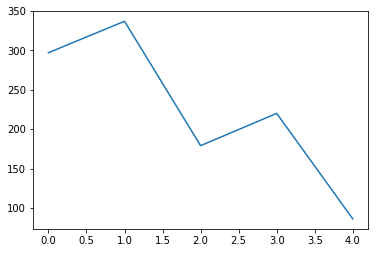

Real Percentage of gain: -0.2885281472254213
Percentage of gain: 0.9314779982651288
Total gain: 1043.2553580569443
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 22  80]
 [ 83 111]]
0.44932432432432434
Percentile:  1
[[ 16  70]
 [128 124]]
0.41420118343195267
Percentile:  2
[[  1  40]
 [ 20 117]]
0.6629213483146067
Percentile:  3
[[ 17  55]
 [ 15 133]]
0.6818181818181818
Percentile:  4
[[15 20]
 [ 0 51]]
0.7674418604651163
000000000000000000000000000000000000000000000000
Working on... PYPL
11.940298507462696
0.005534927156825336
Diff in tren train and test
0.7344935296742525
0.7526785714285714
F1,score 0.5316653635652854
G-score: 0.5133636027132108
Accuracy 0.46517857142857144
Window: 200
[[181  96]
 [503 340]]
Vol pos 4.169820304480426
Vol neg 3.4285804707265113


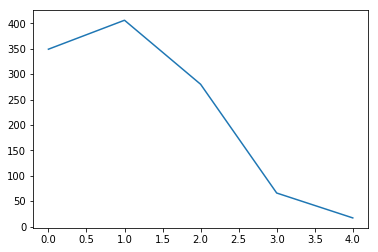

Real Percentage of gain: 32.5752666119772
Percentage of gain: 0.10603274702600142
Total gain: 118.75667666912159
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 43  25]
 [159 124]]
0.4757834757834758
Percentile:  1
[[ 56  25]
 [253  70]]
0.3118811881188119
Percentile:  2
[[ 54  21]
 [ 89 115]]
0.6057347670250897
Percentile:  3
[[24 25]
 [ 0 17]]
0.6212121212121212
Percentile:  4
[[ 4  0]
 [ 1 13]]
0.9444444444444444
000000000000000000000000000000000000000000000000
Working on... GILD
12.784895482130821
0.0
Diff in tren train and test
0.4758928571428571
0.49107142857142855
F1,score 0.06367924528301887
G-score: 0.16047179245041418
Accuracy 0.2910714285714286
Window: 200
[[299 271]
 [523  27]]
Vol pos 2.7575017841819727
Vol neg 4.707049353008083


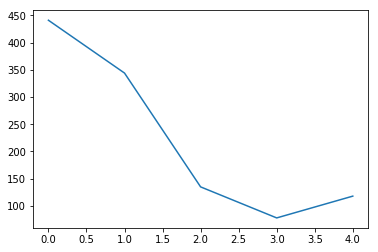

Real Percentage of gain: -382.71474491057427
Percentage of gain: -2.5343317898616915
Total gain: -2838.4516046450944
000000000000000000000000000000000000000000000000
Percentile:  0
[[172  84]
 [159  26]]
0.4489795918367347
Percentile:  1
[[ 89  25]
 [230   0]]
0.25872093023255816
Percentile:  2
[[  1   2]
 [132   0]]
0.007407407407407408
Percentile:  3
[[12 66]
 [ 0  0]]
0.15384615384615385
Percentile:  4
[[25 93]
 [ 0  0]]
0.211864406779661
000000000000000000000000000000000000000000000000
Working on... COST
5.257825954817153
0.0
Diff in tren train and test
0.677376171352075
0.7044642857142858
F1,score 0.27459459459459457
G-score: 0.3957102481615538
Accuracy 0.40089285714285716
Window: 200
[[322   9]
 [662 127]]
Vol pos 1.3430209466650411
Vol neg 1.792805903320788


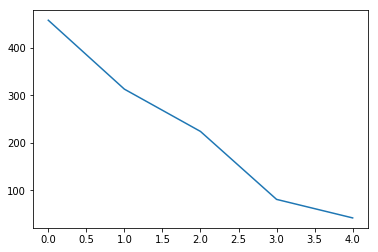

Real Percentage of gain: -133.04421210618037
Percentage of gain: -0.5356753179246834
Total gain: -599.9563560756453
000000000000000000000000000000000000000000000000
Percentile:  0
[[229   9]
 [193  27]]
0.5589519650655022
Percentile:  1
[[ 88   0]
 [208  17]]
0.3354632587859425
Percentile:  2
[[  5   0]
 [182  37]]
0.1875
Percentile:  3
[[ 0  0]
 [72  9]]
0.1111111111111111
Percentile:  4
[[ 0  0]
 [ 6 36]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... QCOM
15.039417828987261
0.008409014463509178
Diff in tren train and test
0.47657295850066933
0.725
F1,score 0.5139664804469274
G-score: 0.49329358195067813
Accuracy 0.45625
Window: 200
[[189 119]
 [490 322]]
Vol pos 6.608185616692587
Vol neg 2.828511670713585


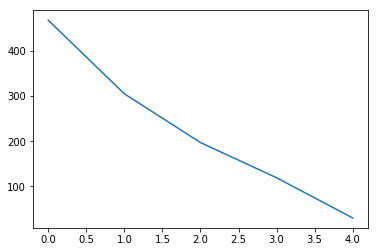

Real Percentage of gain: 83.09754813477701
Percentage of gain: 1.4769814666654815
Total gain: 1654.2192426653392
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 71  61]
 [298  40]]
0.23617021276595745
Percentile:  1
[[ 20  51]
 [155  76]]
0.31788079470198677
Percentile:  2
[[ 46   0]
 [ 35 116]]
0.8223350253807107
Percentile:  3
[[50  7]
 [ 1 61]]
0.9327731092436975
Percentile:  4
[[ 2  0]
 [ 0 28]]
1.0
000000000000000000000000000000000000000000000000
Mean acc over portfolio: 0.44014447080784463
Mean gain over portfolio :  -222.27142044625322
Real mean gain over portfolio -80.45907436337566


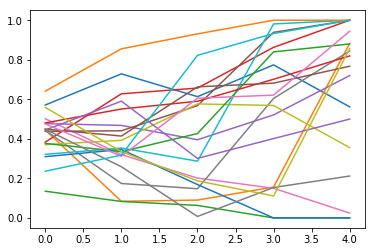

In [9]:
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
pricegainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    scaler = MinMaxScaler() 
    scaler.fit(xtemp)
    MinMaxScaler(copy=True, feature_range=(0, 1))
    xtemp=scaler.transform(xtemp)
    
    
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        yprice=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            yprice.append(abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        pricegain=0
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
                pricegain=pricegain+yprice[j]
            else:
                voln.append(yvolatilitytest[j])
                pricegain=pricegain-yprice[j]
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        realacc=rbf_svm.score(x_test,y_test)
        accstocksresults.append(realacc)
        print('Accuracy',realacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        print('Real Percentage of gain:',(pricegain*100)/(sum(price.iloc[1:6]['open'])))
        pricegainlist.append((pricegain*100)/(sum(price.iloc[1:6]['open'])))
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean acc over portfolio:',sum(accstocksresults)/len(accstocksresults))
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
print('Real mean gain over portfolio',sum(pricegainlist)/len(pricegainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

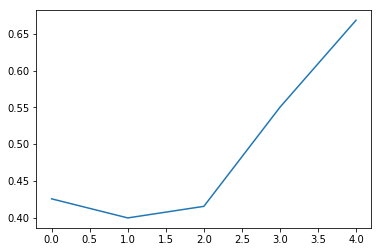

In [10]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()